# **Recreating different kinds of curves with linear regression, a view beyond the regular polynomial aproximation**

## The polynomial aproximation relys on the necessity to approach different kind of curves (mainly the harder ones) with a n degree polynomium, this results in a way batter function to work with, to find his roots, to derivate, and for a analitic analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## This is a hands on study about how Linear Regression can be used to generate diferent kinds of curves trough the input transformation, allowing a simple and fast solution that can be used to model different kinds of harder curves.

### The input will be by default a array of positive integers from 1 to 99, like a time series data where the discrete representation is a common thing

In [2]:
train_data = np.arange(1,100).reshape(-1, 1)

## Starting with a simple linear data

# Starting with simmpler ones, just default polinomyus

Text(0.5, 1.0, 'Original data')

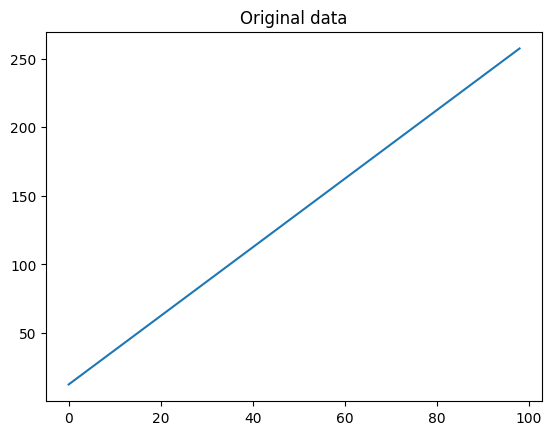

In [3]:
data_linear = np.arange(1,100) * 2.5 + 10
plt.plot(data_linear)
plt.title("Original data")

Text(0.5, 1.0, 'Learned line')

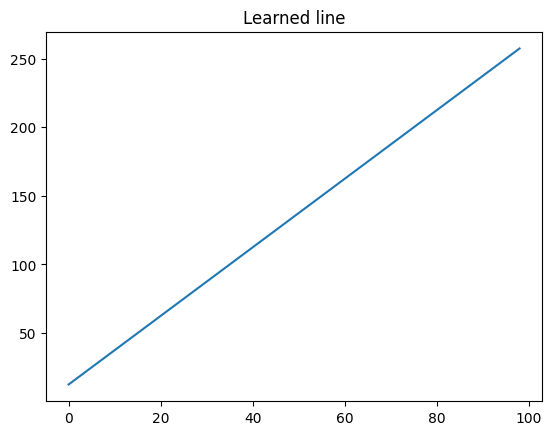

In [4]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data,data_linear)
plt.plot(linear_model.predict(train_data))
plt.title("Learned line")

## 2º Degree polynomium

Text(0.5, 1.0, 'Original data')

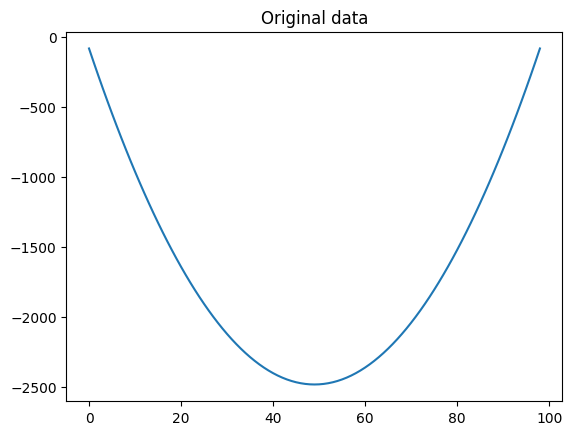

In [5]:
x = np.arange(1,100)
data_2_degree = x ** 2  - x* 100 + 15
plt.plot(data_2_degree)
plt.title("Original data")

### To create a non linear shaped curve with LinearRegression, transform the input is the basic step, allowing the model to learn just the parameters of each variable;

### A linear model just know this : **ax + b**  
### So you need to give him a part of the work done if you want to deal with more complex functions. To fit a second degree in a linear model, its just a simple **(x)^2 + x** transformed input, feeded to the model input, from the point of view of the linear model, its a basicly regular **ax + bx + c** to deal with, so the a, b and c, will be learned in the same way! In fact its simple to see: a(x)^2 +  b(x) + c = a(x^2) + b(x) + c

In [6]:
train_data_2_dgr = pd.DataFrame({"A":np.arange(1,100) , "B":np.arange(1,100)})
train_data_2_dgr.head()

,A,B
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


Text(0.5, 1.0, 'Learned curve')

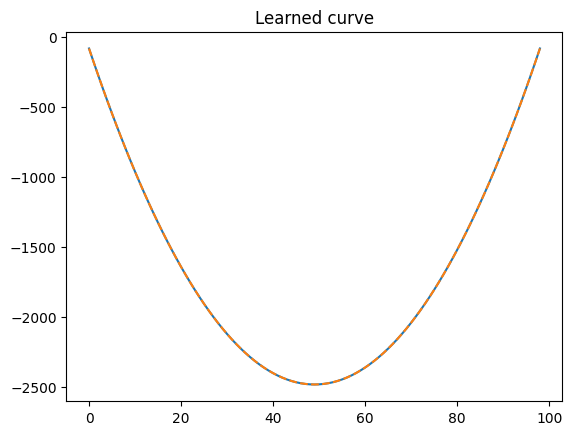

In [7]:
train_data_2_dgr["A"] = train_data_2_dgr["A"] ** 2 ## Transforming the input powering to 2
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(train_data_2_dgr,data_2_degree)
plt.plot(linear_model.predict(train_data_2_dgr))
plt.plot(data_2_degree,linestyle = "--")
plt.title("Learned curve")

# More complex curves
## For a periodic curve like sin and cos, the using of a regular polynomium of a n degree, will not be enough to fit the curve,its also harder to fit with just a simple input transformation in the input, the composition of many curves can generate really different and complicated patterns. The fourier series are able to deal with this, the key here is than, find the right size of the period.

## Sin Cos product curves

## Periodic curves

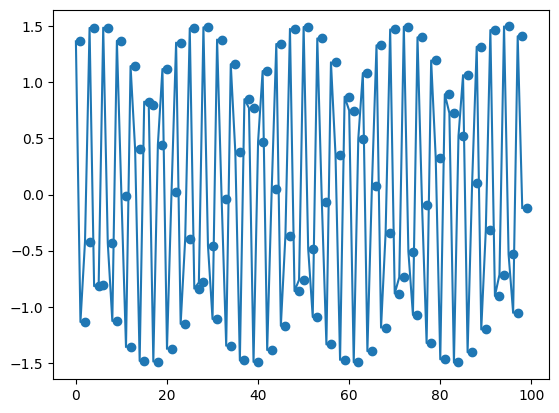

In [8]:
sin_data = np.sin(train_data) * (np.cos(train_data)) + np.sin(2 *train_data)
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(sin_data)
plt.scatter(train_data ,sin_data)

In [9]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2)

train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data

,const,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...
95,1.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,0.683262,0.730174,0.997799,0.066307
97,1.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,0.379608,-0.925148,-0.702386,0.711796


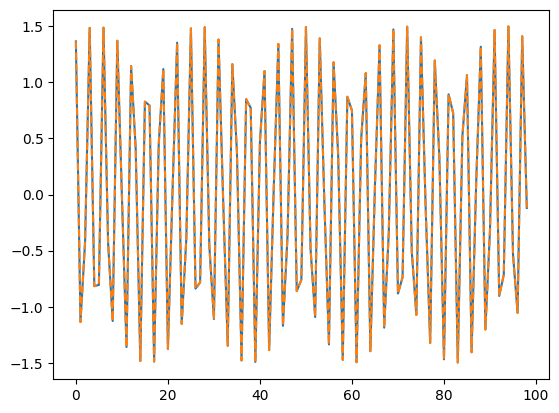

In [10]:
sin_cos_model = LinearRegression(fit_intercept=False)
sin_cos_model.fit(train_sin_cos_data,sin_data)
plt.plot(sin_cos_model.predict(train_sin_cos_data))
plt.plot(sin_data,linestyle = "--")

In [11]:
intercept = sin_cos_model.intercept_
coefficients = sin_cos_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

    
print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-1.5396490363111576e-17 * const) + (3.1086244689504383e-15 * sin(1,6.28)) + (-4.3021142204224816e-16 * cos(1,6.28)) + (-0.6242202548207153 * sin(2,6.28)) + (1.363946140238519 * cos(2,6.28)) +


## Log curve

## For a simple log curve, who its not hard to see a simple transformation in the input can do the work.

### Just a simple log curve

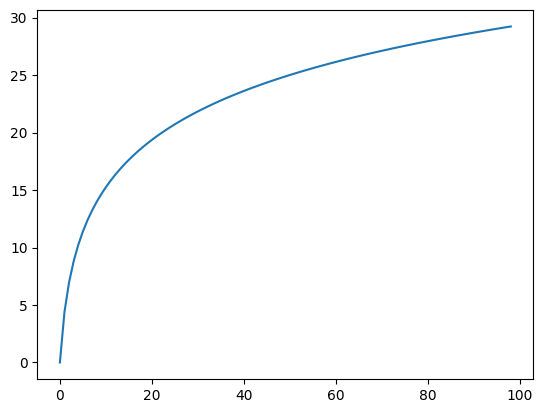

In [12]:
log_data = 3.86 * np.log(train_data) + 2.5 *(np.log(train_data)) 
plt.plot(log_data)

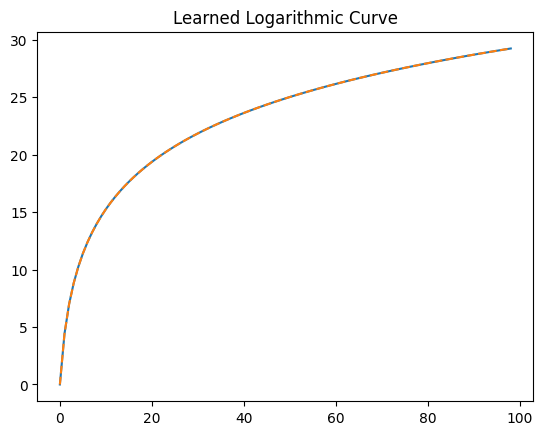

In [13]:
plt.title("Original Logarithmic Data")
# Transform data for linear regression
log_train_data = np.log(train_data)
log_model = LinearRegression(fit_intercept=True)
linear_model.fit(log_train_data, log_data)
log_predictions = linear_model.predict(log_train_data)

plt.plot(log_predictions)
plt.plot(log_data, linestyle="--")
plt.title("Learned Logarithmic Curve")
plt.show()

### For a more complicated combination of the log function, a simple tranformation is also not enough, but as will been seen, the polynomial aproximation is able to deal with this.

## Product of logs

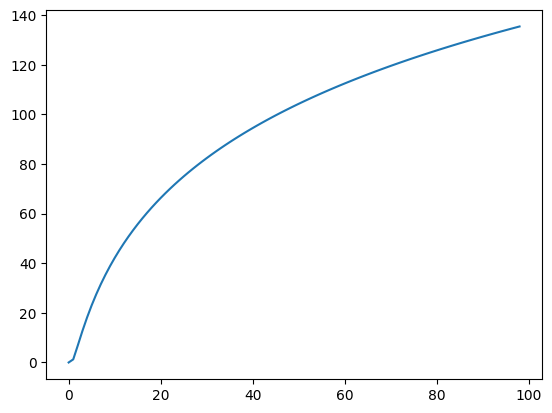

In [14]:
log_prod_data = 3.86 *  np.log(train_data ** 2) * 2.5 * (np.log(np.log(train_data + 1))) 
plt.plot(log_prod_data)

### **First approach**

Text(0.5, 1.0, 'learned curve')

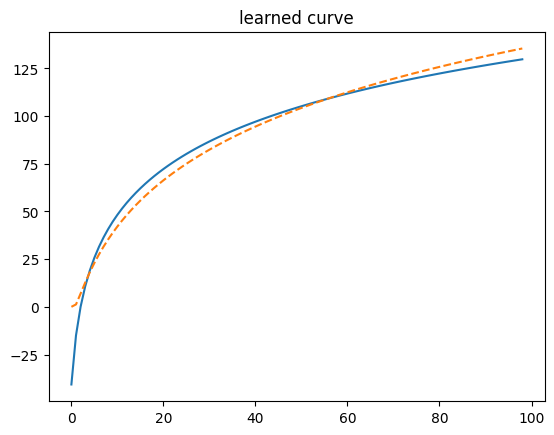

In [15]:
log_prod_train_data = np.log(train_data) 
log_model = LinearRegression(fit_intercept=True)
log_model.fit(log_prod_train_data, log_prod_data)
log_prod_predictions = log_model.predict(log_prod_train_data)

plt.plot(log_prod_predictions)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

### Bellow the use of *DeterministicProcess* function will do the work to transform the input to all **n** required degrees.

### **Using log with polynomiun of second degree**

In [16]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=2)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,log
1,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,0.693147
3,1.0,3.0,9.0,1.098612
4,1.0,4.0,16.0,1.386294
5,1.0,5.0,25.0,1.609438


Text(0.5, 1.0, 'learned curve')

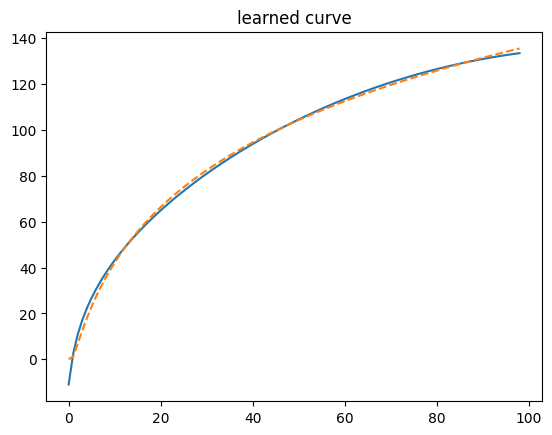

In [17]:

log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

### **Including log and 3 degree polynomium**

In [18]:
dplog = DeterministicProcess( np.arange(1,100), constant=True,order=3)
log_prod_train_data2 = dplog.in_sample()
log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,log
1,1.0,1.0,1.0,1.0,0.000000
2,1.0,2.0,4.0,8.0,0.693147
3,1.0,3.0,9.0,27.0,1.098612
4,1.0,4.0,16.0,64.0,1.386294
5,1.0,5.0,25.0,125.0,1.609438


Text(0.5, 1.0, 'learned curve')

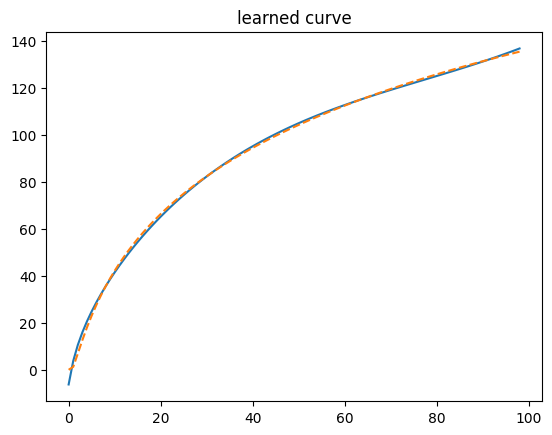

In [19]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

### **Using a polynomium only aproximation , 5 degree**

In [20]:
dplog = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) ,order = 5)
log_prod_train_data2 = dplog.in_sample()
# log_prod_train_data2["log"] =log_prod_train_data
log_prod_train_data2.head()

,const,trend,trend_squared,trend_cubed,trend**4,trend**5
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0,16.0,32.0
3,1.0,3.0,9.0,27.0,81.0,243.0
4,1.0,4.0,16.0,64.0,256.0,1024.0
5,1.0,5.0,25.0,125.0,625.0,3125.0


Text(0.5, 1.0, 'learned curve')

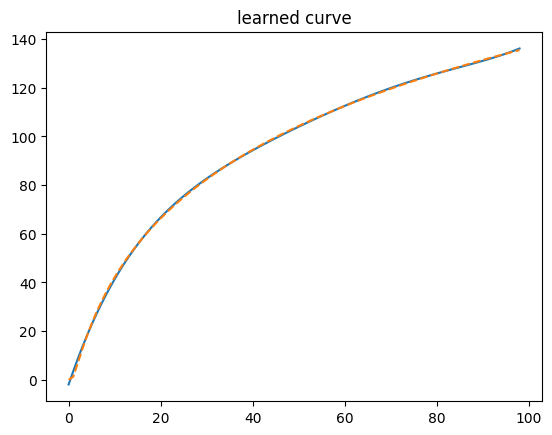

In [21]:
log_model2 = LinearRegression(fit_intercept=False)
log_model2.fit(log_prod_train_data2, log_prod_data)
log_prod_predictions2 = log_model2.predict(log_prod_train_data2)

plt.plot(log_prod_predictions2)
plt.plot(log_prod_data, linestyle="--")
plt.title("learned curve")

In [22]:
intercept = log_model2.intercept_
coefficients = log_model2.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {log_prod_train_data2.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-7.675674904426817 * const) + (5.9118147161690535 * trend) + (-0.15834558553360809 * trend_squared) + (0.0025888429034758875 * trend_cubed) + (-2.1518721525407014e-05 * trend**4) + (6.998804824576155e-08 * trend**5) +


# Combining simple trend movement with cycles

## This curve combines the input with the periodic curves to create a pattern that changes as the input grows, (or the time pass if you want look this way). Looking just to the data in first moment, can be a litle bit scary, but actually this is a really simple combination, the input x is multiplied by periodic curves in a linear form, wich allows a more simple analisys.

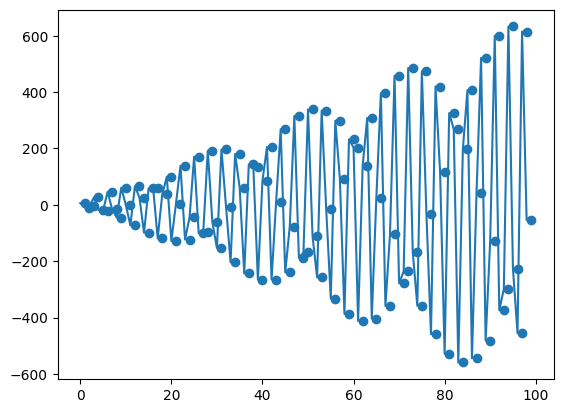

In [23]:
sin_cos_data_move = ( 13.35 * train_data  * np.sin(train_data) * np.cos(train_data))
plt.plot(sin_cos_data_move)
plt.scatter(train_data ,sin_cos_data_move)

In [24]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2,order = 3)
train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data

,const,trend,trend_squared,trend_cubed,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,1.0,1.0,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,2.0,4.0,8.0,0.841471,0.540302,0.909297,-0.416147
3,1.0,3.0,9.0,27.0,0.909297,-0.416147,-0.756802,-0.653644
4,1.0,4.0,16.0,64.0,0.141120,-0.989992,-0.279415,0.960170
5,1.0,5.0,25.0,125.0,-0.756802,-0.653644,0.989358,-0.145500
...,...,...,...,...,...,...,...,...
95,1.0,95.0,9025.0,857375.0,-0.245252,0.969459,-0.475524,0.879703
96,1.0,96.0,9216.0,884736.0,0.683262,0.730174,0.997799,0.066307
97,1.0,97.0,9409.0,912673.0,0.983588,-0.180430,-0.354938,-0.934890
98,1.0,98.0,9604.0,941192.0,0.379608,-0.925148,-0.702386,0.711796


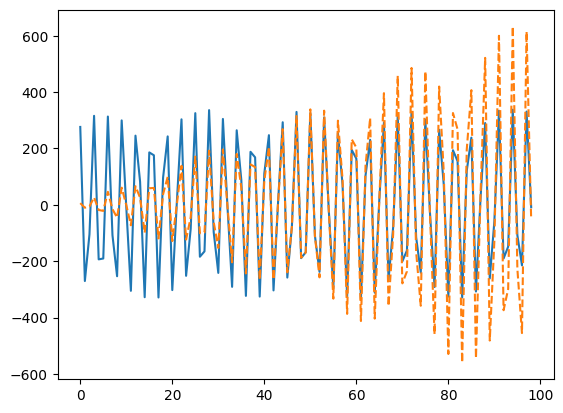

In [25]:
sin_cos_move_model = LinearRegression(fit_intercept=False)
sin_cos_move_model.fit(train_sin_cos_data,sin_cos_data_move)
plt.plot(sin_cos_move_model.predict(train_sin_cos_data))
plt.plot(sin_cos_data_move,linestyle = "--")

In [26]:
intercept = sin_cos_move_model.intercept_
coefficients = sin_cos_move_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-21.718756939898935 * const) + (1.882317256203411 * trend) + (-0.04285960319264952 * trend_squared) + (0.00028119627490608146 * trend_cubed) + (1.4575125642821753 * sin(1,6.28)) + (-3.6559318184895777 * cos(1,6.28)) + (-139.14299290872452 * sin(2,6.28)) + (299.9045754617026 * cos(2,6.28)) +


## The standard approach with fourier curves is good for sum and products of sin and cos curves, but this time the growing pattern made the model only able to learn the central movement of the series, wich is actually not that bad, cause is know at least that the period size and trigonometric curves were fitted right. So the inputs are almost there. 
## Looking to the data, the pattern cleary grows as the time goes, so of course a relationship is happening here, thinking this as a [Time Series Decomposition process](https://www.kaggle.com/code/caiomaxximus/time-series-decomposition-bike-sales-america) , can help to guess that a multiplicative factor is evolved here.

### **Changing approach**

In [27]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=2,order = 1)

train_sin_cos_data = det_proc.in_sample()
train_sin_cos_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] = train_sin_cos_data[["sin(1,6.28)" ,"cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"]] * train_data
train_sin_cos_data

,const,trend,"sin(1,6.28)","cos(1,6.28)","sin(2,6.28)","cos(2,6.28)"
1,1.0,1.0,0.000000,1.000000,0.000000,1.000000
2,1.0,2.0,1.682942,1.080605,1.818595,-0.832294
3,1.0,3.0,2.727892,-1.248441,-2.270407,-1.960931
4,1.0,4.0,0.564480,-3.959970,-1.117662,3.840681
5,1.0,5.0,-3.784012,-3.268218,4.946791,-0.727500
...,...,...,...,...,...,...
95,1.0,95.0,-23.298939,92.098640,-45.174749,83.571778
96,1.0,96.0,65.593125,70.096662,95.788731,6.365458
97,1.0,97.0,95.408011,-17.501754,-34.429021,-90.684301
98,1.0,98.0,37.201558,-90.664459,-68.833860,69.756001


## The method used here is so: scale the curves by the input. The curves already proved to be enough to match the desired period and behaviour, so scalling all the fourier parameters will free the linear model of learn the noise behaviour of the growing pattern. The first experimented function had the following format (The learned weigths were ommited ): **const + x + sin(x) + cos(x) + sin(x) + cos(x)**. The model will learn the indivual weights of the fourier parameters and this is not enough. But in the second approach: **const + x + (sin(x) + cos(x) + sin(x) + cos(x)) * x** , the fourier curves are already scaled and learning will happen in the nature way.

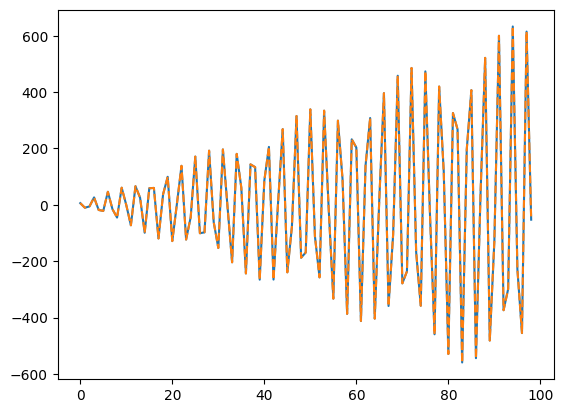

In [28]:
sin_cos_move_model = LinearRegression(fit_intercept=False)
sin_cos_move_model.fit(train_sin_cos_data,sin_cos_data_move)
plt.plot(sin_cos_move_model.predict(train_sin_cos_data))
plt.plot(sin_cos_data_move,linestyle = "--")

In [29]:
intercept = sin_cos_move_model.intercept_
coefficients = sin_cos_move_model.coef_

equation = f'y = '
for i, coef in enumerate(coefficients[0]):
    equation += f' ({coef} * {train_sin_cos_data.columns[i]}) +'

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y =  (-5.861862102639154e-15 * const) + (3.122502256758253e-16 * trend) + (3.1425871020035467e-15 * sin(1,6.28)) + (1.1548921541315593e-15 * cos(1,6.28)) + (-2.777780133952173 * sin(2,6.28)) + (6.069560324061424 * cos(2,6.28)) +


## One last function
### **x * sin(x) * ( cos( log(x + 1)) )**

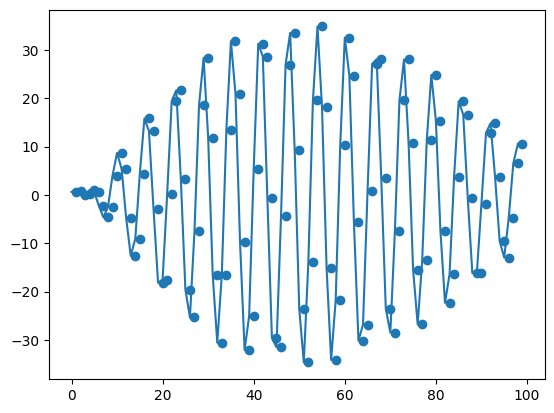

In [30]:
last_non_linear_data = ( train_data * np.sin(train_data) * (np.cos(np.log(train_data + 1))) )
# plt.plot(np.sin(train_data),linestyle = "--")
# plt.plot(np.cos(train_data),linestyle = "--")

plt.plot(last_non_linear_data)
plt.scatter(train_data ,last_non_linear_data)

In [31]:
det_proc = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=1,order = 1)

train_sin_cos_log_data = det_proc.in_sample()
train_sin_cos_log_data

,const,trend,"sin(1,6.28)","cos(1,6.28)"
1,1.0,1.0,0.000000,1.000000
2,1.0,2.0,0.841471,0.540302
3,1.0,3.0,0.909297,-0.416147
4,1.0,4.0,0.141120,-0.989992
5,1.0,5.0,-0.756802,-0.653644
...,...,...,...,...
95,1.0,95.0,-0.245252,0.969459
96,1.0,96.0,0.683262,0.730174
97,1.0,97.0,0.983588,-0.180430
98,1.0,98.0,0.379608,-0.925148


### For a pattern like the one above, the idea is close to the previous example, here the values grow and fall as the time pass, the first task is find the periodic behaviour with the fourier series, than experiement to find the right curve to fit the data.

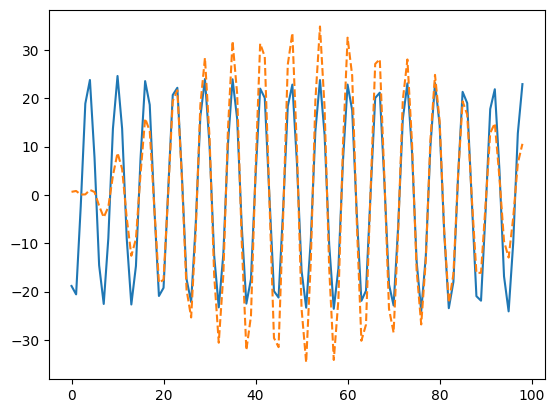

In [32]:
last_model = LinearRegression(fit_intercept=False)
last_model.fit(train_sin_cos_log_data,last_non_linear_data)
plt.plot(last_model.predict(train_sin_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")

### As the values grows and falls close to center of time series, an first guess is use a parabolic curve to generate such behaviour as the previous example, than compose this with the periodic curve to generate the pattern.

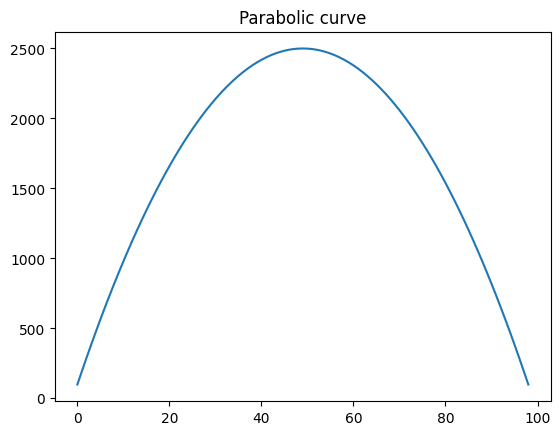

In [33]:
plt.title("Parabolic curve")
plt.plot( train_data ** 2 * -1 +  100* train_data)

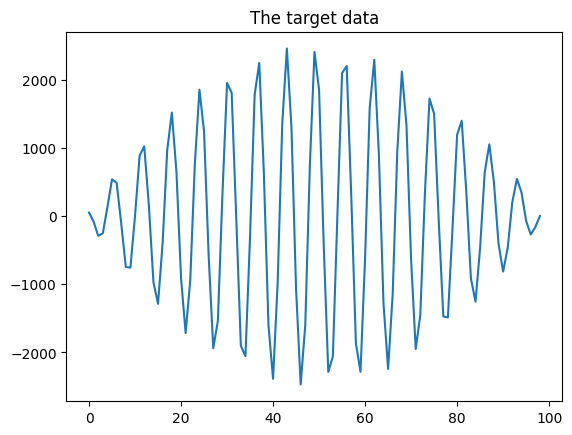

In [34]:
plt.title("The target data")
plt.plot(np.cos(train_data) *  (-train_data ** 2 + (100 * train_data) ))

In [35]:
"""
    Composing the parabolic curve with the fourier curve
"""
train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] =  train_sin_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] *  (-train_data ** 2   +100* train_data) 
train_sin_cos_log_data

,const,trend,"sin(1,6.28)","cos(1,6.28)"
1,1.0,1.0,0.000000,99.000000
2,1.0,2.0,164.928313,105.899252
3,1.0,3.0,264.605551,-121.098729
4,1.0,4.0,54.190083,-380.157119
5,1.0,5.0,-359.481185,-310.480720
...,...,...,...,...
95,1.0,95.0,-116.494693,460.493199
96,1.0,96.0,262.372498,280.386647
97,1.0,97.0,286.224034,-52.505261
98,1.0,98.0,74.403117,-181.328917


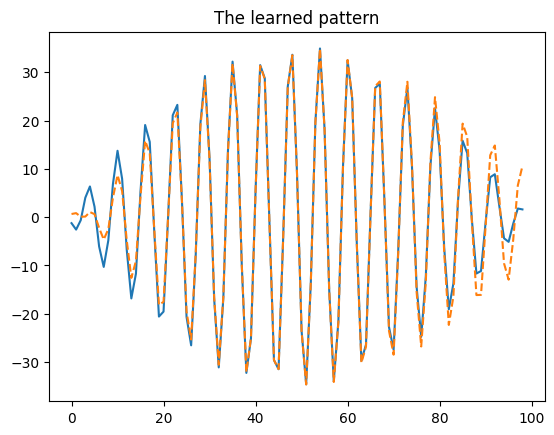

In [36]:
last_model = LinearRegression(fit_intercept=False)
last_model.fit(train_sin_cos_log_data,last_non_linear_data)
plt.title("The learned pattern")
plt.plot(last_model.predict(train_sin_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")

## The leanerd curves fits ok in the center of the data, but defitly is far away in the extremes, the desired data is not simetric, the values on the right falls slower than the left, and this is a way harder pattern to guess. So a different approach can be used

## Lets look the pattern again:

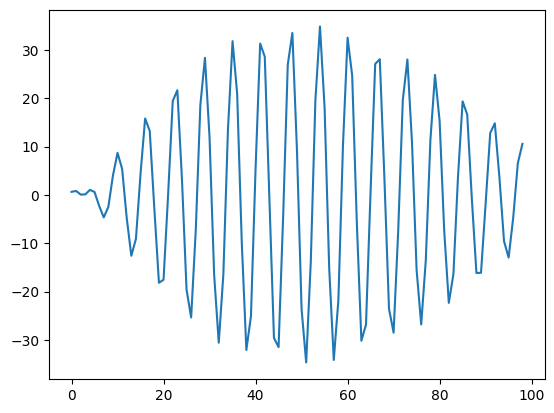

In [37]:
plt.plot(last_non_linear_data)

## What really matters is the curved behaviour of the data, so if it was possible to draw a line and than find the curve, this would be an better solution! The good news are that, well it is! Isolating th lower points of data and than interpolating than, its possible to use the multiplicative approach to create our desired curve.

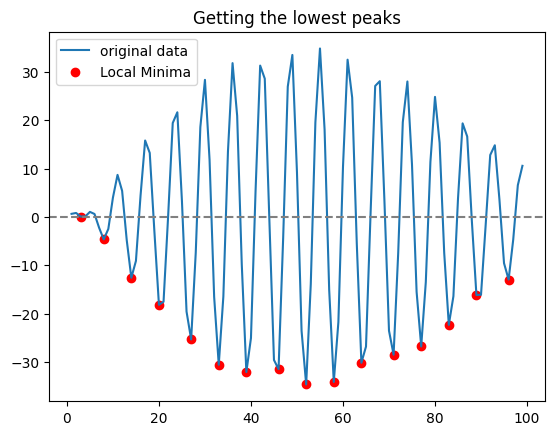

In [38]:
from scipy.signal import find_peaks

y = last_non_linear_data.reshape(1,-1)[0]
minima_indices, _ = find_peaks(-y)

minima_x = x[minima_indices]
minima_y = y[minima_indices]

plt.plot(x, y, label='original data')
plt.title("Getting the lowest peaks")
plt.scatter(minima_x, minima_y, color='red', label='Local Minima')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.show()

### Interpolating to generate the number of data equal to the input X (train_data)

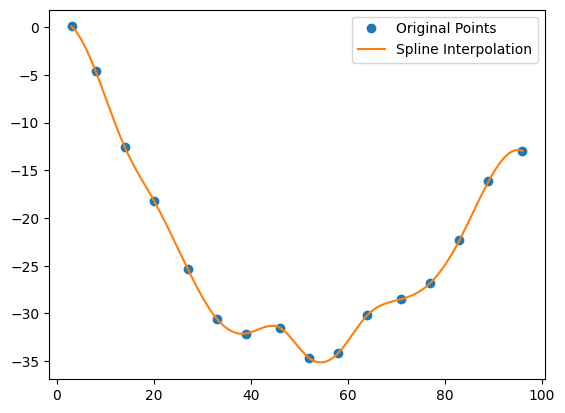

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
x_original = minima_x.reshape(1,-1)[0]
y_original = minima_y.reshape(1,-1)[0]

cs = CubicSpline(x_original, y_original)

x_new = np.linspace(x_original.min(), x_original.max(), 99)
y_new = cs(x_new)
func = y_new.reshape(-1,1)

plt.plot(x_original, y_original, 'o', label='Original Points')
plt.plot(x_new, y_new, '-', label='Spline Interpolation')
plt.legend()
plt.show()

## This time it will be generate a prediction vizualizing both curves in the future. To do this, no only the interpolated data will be used, but a Linear model will learn with the interpolated data, so it will be possible to generate the prediction to be used.

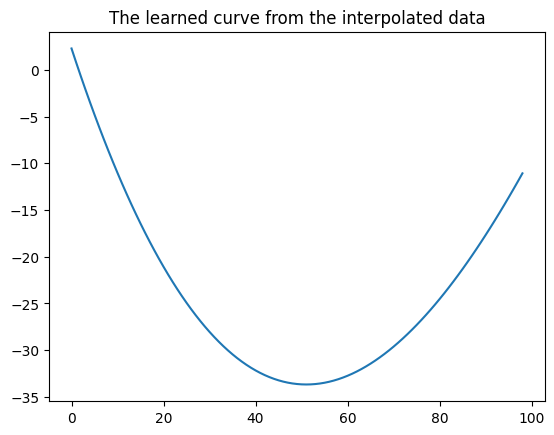

In [40]:
curve_model = LinearRegression(fit_intercept = True)
det_proc_cuve_D = DeterministicProcess(np.arange(1,100) , order = 3)
curve_model.fit(det_proc_cuve_D.in_sample(), y_new)
plt.title("The learned curve from the interpolated data")
plt.plot(curve_model.predict(det_proc_cuve_D.in_sample()))

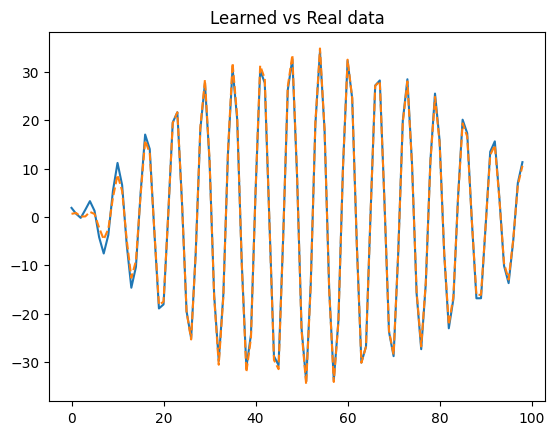

In [41]:

func = curve_model.predict(det_proc_cuve_D.in_sample()).reshape(-1,1)
det_proc_f = DeterministicProcess( np.arange(1,100), constant=True, period=(np.pi * 2) , fourier=1,order = 1)
final_sen_cos_log_data = det_proc_f.in_sample()
final_sen_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] =  final_sen_cos_log_data[["sin(1,6.28)" ,"cos(1,6.28)"]] * func


last_model2 = LinearRegression(fit_intercept=False)
last_model2.fit(final_sen_cos_log_data,last_non_linear_data)
plt.title("Learned vs Real data")
plt.plot(last_model2.predict(final_sen_cos_log_data))
plt.plot(last_non_linear_data,linestyle = "--")

In [42]:
## Using the inital equation to genereta the out of training values
x = np.arange(100,129).reshape(-1, 1)
last_non_linear_data_out_sample = ( x * np.sin(x) * (np.cos(np.log(x + 1))) )

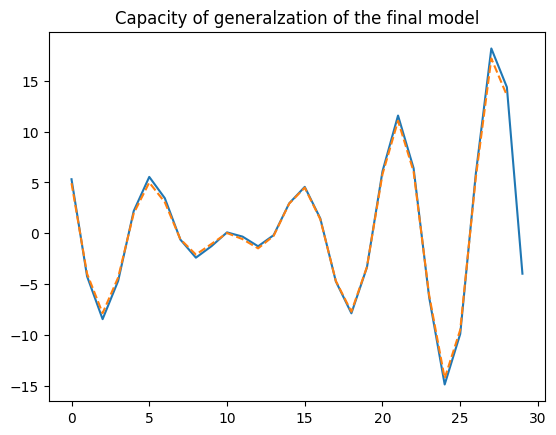

In [43]:
out_sample_f = det_proc_f.out_of_sample(30)
out_sample_f[["sin(1,6.28)" ,"cos(1,6.28)"]] =  out_sample_f[["sin(1,6.28)" ,"cos(1,6.28)"]] * curve_model.predict(det_proc_cuve_D.out_of_sample(30)).reshape(-1,1)
plt.title("Capacity of generalzation of the final model")
plt.plot(last_model2.predict(out_sample_f))
plt.plot(last_non_linear_data_out_sample,linestyle = "--")

# Conclusion

### In order to accurately learn certain curves from linear regression, it is often necessary to go beyond the standard polynomial approximation. Simple polynomial regressions might not capture the underlying complexity of the data, leading to poor model performance.

### Transforming the input features is a crucial step in this process. Feature transformation can help linear models capture non-linear relationships by mapping the original features to a new space where these relationships become linear. This process is not always straightforward and requires careful analysis of the data's behavior.

### Understanding which transformations are necessary typically involves a combination of theoretical insight and experimental validation. By analyzing the behavior of the data, one can hypothesize which transformations might be effective. These hypotheses can then be tested and validated experimentally to ensure they improve the model's performance.

### Thus, a successful approach to regression often combines theoretical understanding of the data, meticulous feature engineering, and empirical validation. This iterative process allows for the development of robust models that can accurately capture complex patterns in the data.